In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Generate Dataset

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X,Y = make_classification(n_classes=2,n_samples=400,n_clusters_per_class=1,random_state=3,n_features=2,n_informative=2,n_redundant=0)

In [ ]:
# Convert Y-labels into (-1,1)
Y[Y==0] = -1 #Broadcasting

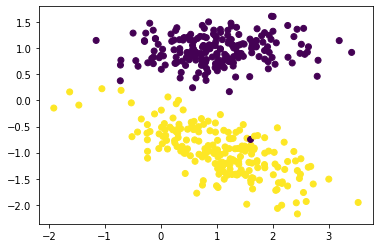

In [ ]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.show()

## SVM class

In [ ]:
class SVM:
    
    def __init__(self,C=1.0):
        self.C = C 
        # Loss and weight zero in the begining
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss = 0.0
        # L = 1/2*dot(W, W.T) + c*simga(max(0, 1-ti))
        loss += .5*np.dot(W,W.T)
        for i in range(X.shape[0]):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C*max(0,(1-ti))
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n = learning_rate
        c = self.C 
        # c is coefficient of penalty
        
        # init the model parameters
        W = np.zeros((1,no_of_features))
        bias = 0
        
        print(self.hingeLoss(W,bias,X,Y))
        
        #Training from here...
        # Weight and Bias update rule 
        losses = []
        
            #Training Loop
        for i in range(maxItr):
            
            l = self.hingeLoss(W,bias,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            #Batch Gradient Descent(as discussed in the Paper) with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                 #Assume 0 gradient for the batch
                gradw = 0
                gradb = 0
                
                #Iterate over all examples in the mini bacth 
                for j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                        
                        if ti>1:
                            gradw += 0
                            gradb += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                            
                # Gradient for batch is ready, Update W,B
                W = W - n*W + n*gradw
                bias = bias + n*gradb
                
        self.W = W
        self.b = bias
        return W,bias,losses
    

In [ ]:
print(X.shape)

(400, 2)


In [ ]:
svm = SVM()
W, bias, losses = svm.fit(X,Y,maxItr=100)
print(losses[0])
print(losses[-1])

400.0
400.0
14.953010017450953


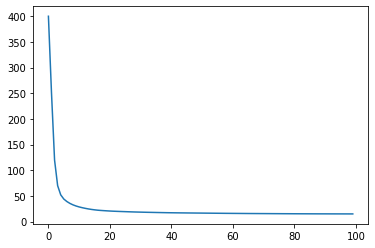

In [ ]:
plt.plot(losses)
plt.show()

In [ ]:
def plot_hyperplane(w1, w2, bias):
    plt.figure(figsize=(12, 12))
    plt.scatter(X[:, 0], X[:, 1], c=Y);
    x1 = np.linspace(-2, 4, 10)
    x2 = -(w1*x1 + bias)/w2
    
    # positive hyper plane
    xp = -(w1*x1 + bias - 1)/w2
    
    # negative hyper plane
    xn = -(w1*x1 + bias + 1)/w2
    
    plt.plot(x1, x2, label = 'Hyperplane WX + B = 0')
    plt.plot(x1, xp, label = 'Hyperplane WX + B = 1')
    plt.plot(x1, xn, label = 'Hyperplane WX + B = -1')
    
    plt.legend()
    plt.show()

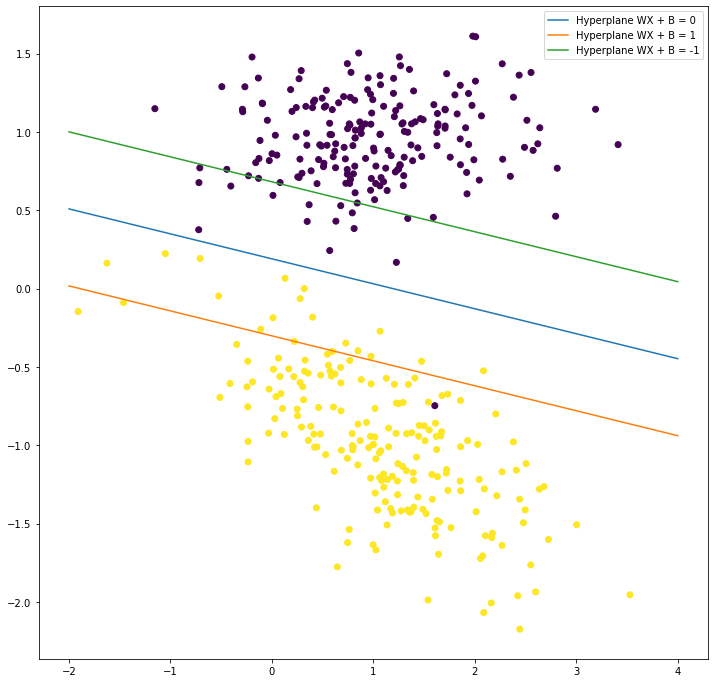

In [ ]:
plot_hyperplane(W[0, 0], W[0, 1], bias)

## Visualising hyperplanes

In [ ]:
svm1 = SVM(C=-1)
W1,B1, losses =svm1.fit(X,Y)

-400.0


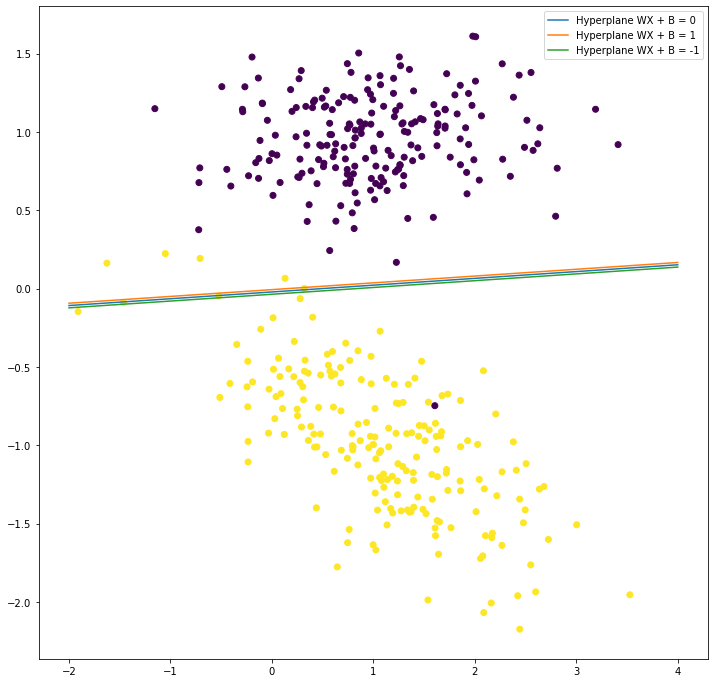

In [ ]:
plot_hyperplane(W1[0, 0], W1[0, 1], B1)